# Experiment 2: Text Classification

## Librairies

In [1]:
import numpy as np
import torch
import pylab as pl
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence
from src.ModelTextClassification import LSTMClassifier

## Data

### IMDB Dataset

In [2]:
NUM_WORDS = 5000
INDEX_FROM = 3
MAX_REVIEW_LENGTH = 100

# --- Import the IMDB data and only consider the ``top_words``` most used words
np.load.__defaults__=(None, True, True, 'ASCII')
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS, index_from=INDEX_FROM)
np.load.__defaults__=(None, False, True, 'ASCII')

word_to_id = imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in X_train[1000] ))
# --- truncate and pad input sequences
X_train = sequence.pad_sequences(X_train, maxlen=MAX_REVIEW_LENGTH, padding='post', truncating='pre', value=0)
X_test = sequence.pad_sequences(X_test, maxlen=MAX_REVIEW_LENGTH, padding='post', truncating='pre', value=0)

print("X_train shape:", X_train.shape)
print("len(X[0]):", len(X_train[0]))
print("len(X[1]):", len(X_train[1]))
print("X[0]:", X_train[0])

<START> although i had seen <UNK> in a theater way back in <UNK> i couldn't remember anything of the plot except for vague images of kurt thomas running and fighting against a backdrop of stone walls and disappointment regarding the ending br br after reading some of the other reviews i picked up a copy of the newly released dvd to once again enter the world of <UNK> br br it turns out this is one of those films produced during the <UNK> that would go directly to video today the film stars <UNK> <UNK> kurt thomas as jonathan <UNK> <UNK> out of the blue to <UNK> the nation of <UNK> to enter and hopefully win the game a <UNK> <UNK> <UNK> by the khan who <UNK> his people by yelling what sounds like <UNK> power the goal of the mission involves the star wars defense system jonathan is trained in the martial arts by princess <UNK> who never speaks or leaves the house once trained tries to blend in with the <UNK> by wearing a bright red <UNK> with <UNK> of blue and white needless to say <UNK>

In [3]:
batch_size = 64

X_train = torch.tensor(X_train, dtype = torch.long)
X_test = torch.tensor(X_test, dtype = torch.long)

y_train = torch.tensor(y_train, dtype = torch.long)
y_test = torch.tensor(y_test, dtype = torch.long)

train_data_tensor = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data_tensor, batch_size=batch_size, shuffle=True)

## Model : LSTM

In [4]:
list_algo = ['SGD', 'MOM', 'NAG', 'ADG', 'RMS', 'ADAM', 'AMS', 'NADAM', 'ADAMAX', 'NOSTA']

## Performances of the Optimization Algorithms : IMDB Dataset

In [5]:
# Some definitions
binary_cross_entropy = torch.nn.BCEWithLogitsLoss()

nb_epochs = 50
input_dim = NUM_WORDS
embedding_dim = 32
hidden_dim = 64
output_dim = 1

alpha = 0.01
beta = 0.9
epsilon = 1e-8

gamma = 0.9999 # RMS Prop

rho = 0.95 # AdaDelta

alpha3 = 0.05 # RMS Prop

beta1 = 0.999   # Adam
beta2 = 0.999 # Adam
alpha1 = 0.001

alpha2 = 0.001 # AMSGrad

In [6]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)


### Stochastic Gradient Descent (SGD)

In [6]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)

L_sgd, A_sgd, lt_sgd, at_sgd = model.training_SGD(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    5, alpha, verbose=True)
n = np.argmax(at_sgd)
lt_sgd, at_sgd = lt_sgd[n].detach().item(), at_sgd[n].detach().item()

Launching SGD training of model
Number of parameters : 185153
tensor([[0.4971],
        [0.4843],
        [0.5107],
        [0.5138],
        [0.5237],
        [0.4868],
        [0.5117],
        [0.5128],
        [0.5173],
        [0.5042],
        [0.4957],
        [0.4944],
        [0.4951],
        [0.5195],
        [0.5301],
        [0.5400],
        [0.5334],
        [0.5320],
        [0.5527],
        [0.5441],
        [0.4950],
        [0.4873],
        [0.4917],
        [0.5173],
        [0.5142],
        [0.5231],
        [0.5062],
        [0.5013],
        [0.5157],
        [0.5219],
        [0.5313],
        [0.5293],
        [0.5246],
        [0.5189],
        [0.5257],
        [0.5290],
        [0.5289],
        [0.5306],
        [0.5290],
        [0.5051],
        [0.5192],
        [0.5205],
        [0.5205],
        [0.5368],
        [0.5219],
        [0.5167],
        [0.5081],
        [0.5228],
        [0.5279],
        [0.5318],
        [0.5205],
        [0.4944],
  

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [7]:
A_sgd

[tensor(0.5000),
 tensor(0.5500),
 tensor(0.5250),
 tensor(0.4750),
 tensor(0.5750)]

In [27]:
import torch.nn.functional as F

In [59]:
list_pred = []
list_y = []

In [60]:
for x,y in train_loader:
   y_hat = F.sigmoid(model.forward(x)).squeeze().float()
   list_pred.append(y_hat)
   list_y.append(y)

In [7]:
A_sgd

[tensor(0.5000),
 tensor(0.5000),
 tensor(0.5000),
 tensor(0.4375),
 tensor(0.4688)]

### Momentum (MOM)

In [7]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_mom, A_mom, lt_mom, at_mom = model.training_Mom(
    binary_cross_entropy, 
    train_loader, X_test, y_test, nb_epochs, alpha, beta, verbose=True)
n = np.argmax(at_mom)
lt_mom, at_mom = lt_mom[n].detach().item(), at_mom[n].detach().item()

Launching Momentum training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.6998060941696167
Epoch 11 / 50 : Loss = 0.7020366191864014
Epoch 21 / 50 : Loss = 0.6843255162239075
Epoch 31 / 50 : Loss = 0.6918050050735474
Epoch 41 / 50 : Loss = 0.661031186580658


### Nesterov Accelerated Gradient (NAG)

In [8]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_nag, A_nag, lt_nag, at_nag = model.training_NAG(
    binary_cross_entropy, 
    train_loader, X_test, y_test, nb_epochs, alpha, beta, verbose=True)
n = np.argmax(at_nag)
lt_nag, at_nag = lt_nag[n].detach().item(), at_nag[n].detach().item()

Launching NAG training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.683505654335022
Epoch 11 / 50 : Loss = 0.6844514608383179
Epoch 21 / 50 : Loss = 0.6861171126365662
Epoch 31 / 50 : Loss = 0.6872428059577942
Epoch 41 / 50 : Loss = 0.6834836602210999


### AdaGrad

In [9]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_adg, A_adg, lt_adg, at_adg = model.training_ADG(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, alpha, epsilon, verbose=True)
n = np.argmax(at_adg)
lt_adg, at_adg = lt_adg[n].detach().item(), at_adg[n].detach().item()

Launching AGD training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.7052638530731201
Epoch 11 / 50 : Loss = 0.6924808621406555
Epoch 21 / 50 : Loss = 0.7025855779647827
Epoch 31 / 50 : Loss = 0.6952094435691833
Epoch 41 / 50 : Loss = 0.6804338693618774


### RMS Prop

In [10]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_rms, A_rms, lt_rms, at_rms = model.training_RMS(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, alpha3, gamma, epsilon, verbose=True)
n = np.argmax(at_rms)
lt_rms, at_rms = lt_rms[n].detach().item(), at_rms[n].detach().item()

Launching RMS training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.6900966167449951
Epoch 11 / 50 : Loss = 0.6900167465209961
Epoch 21 / 50 : Loss = 0.6834526062011719
Epoch 31 / 50 : Loss = 0.6736835837364197
Epoch 41 / 50 : Loss = 0.6556423902511597


### Adam

In [11]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_adam, A_adam, lt_adam, at_adam = model.training_ADAM(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, alpha1, beta1, beta2, epsilon, verbose=True)
n = np.argmax(at_adam)
lt_adam, at_adam = lt_adam[n].detach().item(), at_adam[n].detach().item()

Launching ADAM training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.7150817513465881
Epoch 11 / 50 : Loss = 0.6085407733917236
Epoch 21 / 50 : Loss = 0.555859386920929
Epoch 31 / 50 : Loss = 0.5692412853240967
Epoch 41 / 50 : Loss = 0.6422979831695557


### AMS Grad

In [12]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_ams, A_ams, lt_ams, at_ams = model.training_AMS(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, 0.002, beta1, beta2, epsilon, verbose=True)
n = np.argmax(at_ams)
lt_ams, at_ams = lt_ams[n].detach().item(), at_ams[n].detach().item()

Launching AMS Grad training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.6841508150100708
Epoch 11 / 50 : Loss = 0.5828125476837158
Epoch 21 / 50 : Loss = 0.6573035717010498
Epoch 31 / 50 : Loss = 0.5818799734115601
Epoch 41 / 50 : Loss = 0.5592476725578308


### Nadam

In [13]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_nadam, A_nadam, lt_nadam, at_nadam = model.training_NADAM(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, 0.002, 0.99, 0.999, epsilon, verbose=True)
n = np.argmax(at_nadam)
lt_nadam, at_nadam = lt_nadam[n].detach().item(), at_nadam[n].detach().item()

Launching NADAM training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.7048099040985107
Epoch 11 / 50 : Loss = 0.5805677175521851
Epoch 21 / 50 : Loss = 0.55711829662323
Epoch 31 / 50 : Loss = 0.5871849656105042
Epoch 41 / 50 : Loss = 0.6134090423583984


### Adamax

In [14]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_adamax, A_adamax, lt_adamax, at_adamax = model.training_ADAMAX(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, 0.002, 0.95, 0.999, 0, epsilon, verbose=True)
n = np.argmax(at_adamax)
lt_adamax, at_adamax = lt_adamax[n].detach().item(), at_adamax[n].detach().item()

Launching ADAMAX training of model
Number of parameters : 542561
Epoch 1 / 50 : Loss = 0.7065667510032654
Epoch 11 / 50 : Loss = 0.6560827493667603
Epoch 21 / 50 : Loss = 0.6213620901107788
Epoch 31 / 50 : Loss = 0.6460992097854614
Epoch 41 / 50 : Loss = 0.5191546678543091


### Nostalgic Adam

In [15]:
model = LSTMClassifier(input_dim, embedding_dim, hidden_dim, output_dim)
L_nos, A_nos, lt_nos, at_nos = model.training_NOS(
    binary_cross_entropy, 
    train_loader, X_test, y_test, 
    nb_epochs, 0.005, 0.9, 1e-4, epsilon, verbose=True)
n = np.argmax(at_nos)
lt_nos, at_nos = lt_nos[n].detach().item(), at_nos[n].detach().item()

Launching Nostalgic Adam training of model
Number of parameters : 542561
Epoch 10 / 50 : Loss = 0.6736137866973877
Epoch 20 / 50 : Loss = 0.6445744633674622
Epoch 30 / 50 : Loss = 0.6581920385360718
Epoch 40 / 50 : Loss = nan
Epoch 50 / 50 : Loss = nan


## Plot Training 

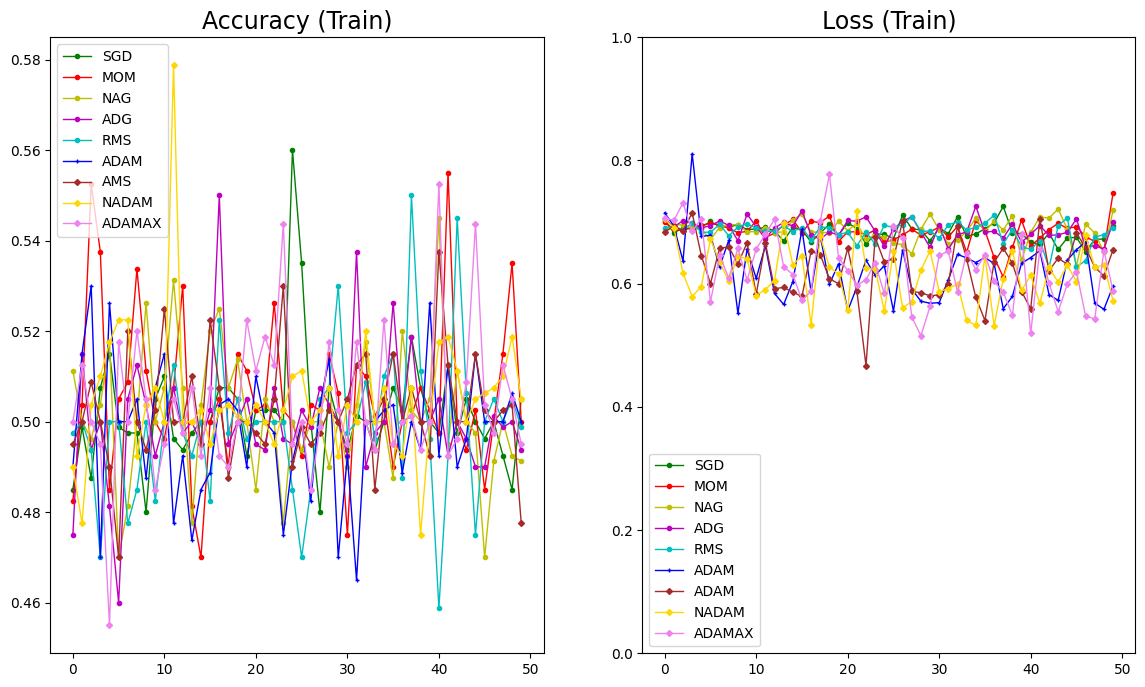

In [19]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(A_sgd, 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(A_mom, 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(A_nag, 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(A_adg, 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(A_rms, 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(A_adam, 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(A_ams, marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(A_nadam, marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(A_adamax, marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].set_title("Accuracy (Train)", size=17)
ax[0].legend()

ax[1].plot([v.item() for v in L_sgd], 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot([v.item() for v in L_mom], 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot([v.item() for v in L_nag], 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot([v.item() for v in L_adg], 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot([v.item() for v in L_rms], 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot([v.item() for v in L_adam], 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot([v.item() for v in L_ams], marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot([v.item() for v in L_nadam], marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot([v.item() for v in L_adamax], marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_ylim(0,1)
ax[1].legend()

AttributeError: 'Axes' object has no attribute 'savefig'

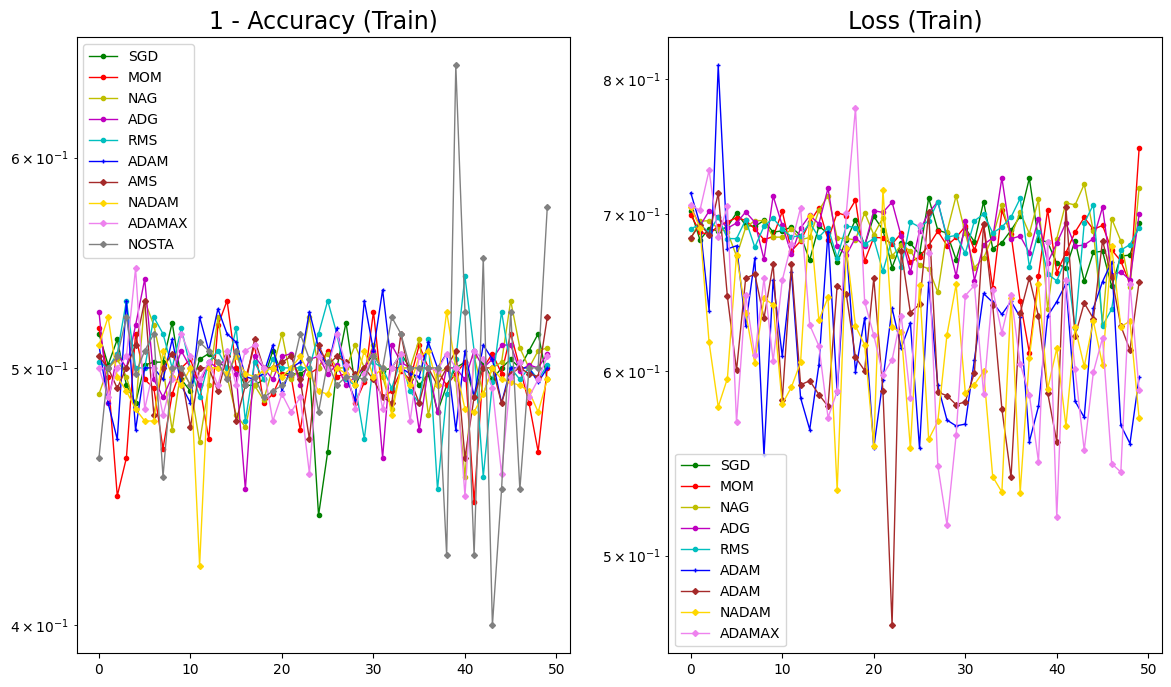

In [52]:
fig, ax = pl.subplots(1,2, figsize=(14,8))

ax[0].plot(1-np.array(A_sgd), 'go-', markersize=3, linewidth=1, label='SGD')
ax[0].plot(1-np.array(A_mom), 'ro-', markersize=3, linewidth=1, label='MOM')
ax[0].plot(1-np.array(A_nag), 'yo-', markersize=3, linewidth=1, label='NAG')
ax[0].plot(1-np.array(A_adg), 'mo-', markersize=3, linewidth=1, label='ADG')
ax[0].plot(1-np.array(A_rms), 'co-', markersize=3, linewidth=1, label='RMS')
ax[0].plot(1-np.array(A_adam), 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[0].plot(1-np.array(A_ams), marker='D', color='brown', markersize=3, linewidth=1, label='AMS')
ax[0].plot(1-np.array(A_nadam), marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[0].plot(1-np.array(A_adamax), marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[0].plot(1-np.array(A_nos), marker='D', color='gray', markersize=3, linewidth=1, label='NOSTA')
ax[0].set_title("1 - Accuracy (Train)", size=17)
ax[0].set_yscale('log')
ax[0].legend()

ax[1].plot([v.item() for v in L_sgd], 'go-', markersize=3, linewidth=1, label='SGD')
ax[1].plot([v.item() for v in L_mom], 'ro-', markersize=3, linewidth=1, label='MOM')
ax[1].plot([v.item() for v in L_nag], 'yo-', markersize=3, linewidth=1, label='NAG')
ax[1].plot([v.item() for v in L_adg], 'mo-', markersize=3, linewidth=1, label='ADG')
ax[1].plot([v.item() for v in L_rms], 'co-', markersize=3, linewidth=1, label='RMS')
ax[1].plot([v.item() for v in L_adam], 'b+-', markersize=3, linewidth=1, label='ADAM')
ax[1].plot([v.item() for v in L_ams], marker='D', color='brown', markersize=3, linewidth=1, label='ADAM')
ax[1].plot([v.item() for v in L_nadam], marker='D', color='gold', markersize=3, linewidth=1, label='NADAM')
ax[1].plot([v.item() for v in L_adamax], marker='D', color='violet', markersize=3, linewidth=1, label='ADAMAX')
ax[1].set_title("Loss (Train)", size=17)
ax[1].set_yscale('log')
ax[1].legend()

ax[1].savefig('acc_text.png', bbox_inches='tight')
fig.savefig('loss_text.png', bbox_inches='tight')

In [51]:
list_test_loss = [lt_sgd, lt_mom, lt_nag, lt_adg, lt_rms, lt_adam, lt_ams, lt_nadam, lt_adamax, lt_nos]
list_test_accu = [at_sgd, at_mom, at_nag, at_adg, at_rms, at_adam, at_ams, at_nadam, at_adamax, at_nos]
dico = {'Name':list_algo, 'Loss':list_test_loss, 'Accuracy':list_test_accu}
df_mnist = pd.DataFrame(dico)
df_mnist

,Name,Loss,Accuracy
0,SGD,0.693512,0.5
1,MOM,0.693065,0.5
2,NAG,0.693292,0.5
3,ADG,0.693124,0.5
4,RMS,0.692860,0.5
5,ADAM,0.702054,0.5
6,AMS,0.693114,0.5
7,NADAM,0.693171,0.5
8,ADAMAX,0.695534,0.5
9,NOSTA,0.692756,0.5
